In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import pingouin as pg

In [20]:
#importing the dataset and checking initial information
jobs = pd.read_csv(r"C:\Users\fer_l\OneDrive\Área de Trabalho\Portifolio Py\Projeto 1\Dataset.csv", sep=',')
print(jobs.head(5))
print(len(jobs))
jobs.describe()

   work_year             job_title                    job_category  \
0       2023  Data DevOps Engineer                Data Engineering   
1       2023        Data Architect  Data Architecture and Modeling   
2       2023        Data Architect  Data Architecture and Modeling   
3       2023        Data Scientist       Data Science and Research   
4       2023        Data Scientist       Data Science and Research   

  salary_currency  salary  salary_in_usd employee_residence experience_level  \
0             EUR   88000          95012            Germany        Mid-level   
1             USD  186000         186000      United States           Senior   
2             USD   81800          81800      United States           Senior   
3             USD  212000         212000      United States           Senior   
4             USD   93300          93300      United States           Senior   

  employment_type work_setting company_location company_size  
0       Full-time       Hybrid     

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


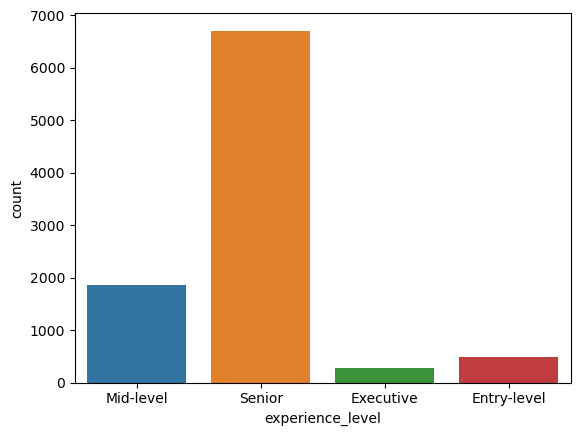

In [21]:
#analyzing sample size by experience_level and filtering for senior positions
sns.countplot(x='experience_level', data=jobs)
plt.show()

In [22]:
#analyzing just seniors
jobs = jobs[jobs['experience_level']=='Senior']

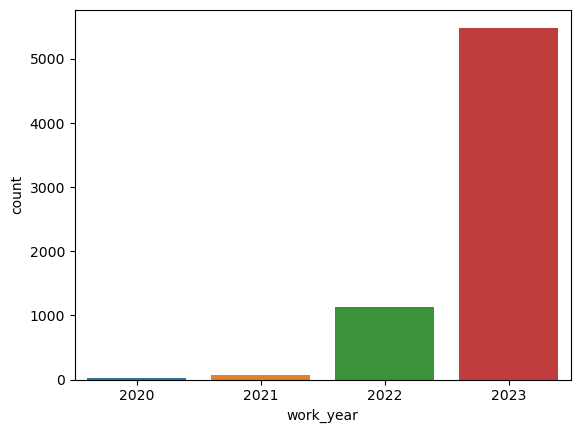

In [23]:
sns.countplot(x='work_year', data=jobs)
plt.show()

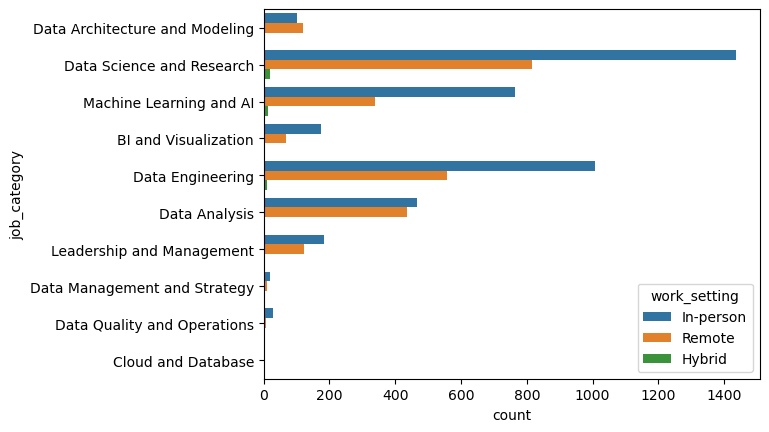

In [24]:
#analyzing count by work_setting
sns.countplot(y='job_category', data=jobs, hue='work_setting')
plt.show()

In [25]:
print(jobs['work_setting'].value_counts(normalize=True))

In-person    0.623342
Remote       0.369355
Hybrid       0.007304
Name: work_setting, dtype: float64


In [26]:
print(jobs['work_setting'].value_counts(ascending=False))

In-person    4182
Remote       2478
Hybrid         49
Name: work_setting, dtype: int64


In [27]:
#filtering only remote and in-person positions and excluding "Cloud and Database" (zero for In-person)
jobs = jobs[jobs['work_setting']!='Hybrid']
jobs = jobs[jobs['job_category']!='Cloud and Database']

In [28]:
print(jobs.groupby('work_setting')['salary_in_usd'].mean())

work_setting
In-person    165689.860832
Remote       157713.566518
Name: salary_in_usd, dtype: float64


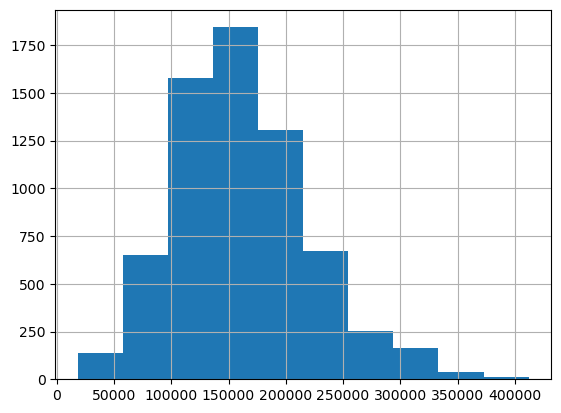

In [29]:
#Do in-person positions have higher salaries than remote positions?
#analyzing whether salaries follow a normal distribution
jobs['salary_in_usd'].hist()
plt.show()

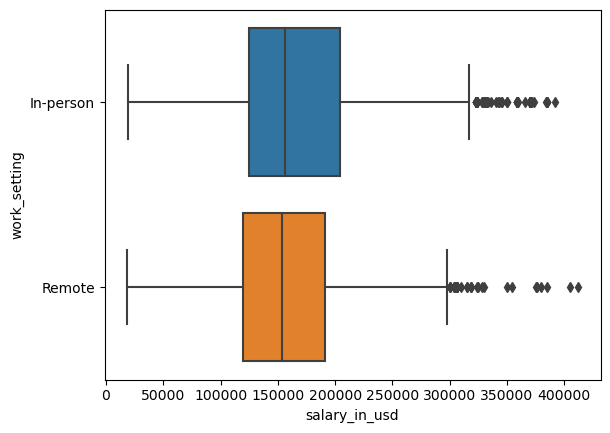

In [30]:
sns.boxplot(x='salary_in_usd', y='work_setting', data=jobs)
plt.show()

In [31]:
#as it does not follow a normal distribution, use the Wilcoxon-Mann-Whitney method for each job_category
job_category = jobs['job_category'].unique().tolist()
print(job_category)

['Data Architecture and Modeling', 'Data Science and Research', 'Machine Learning and AI', 'BI and Visualization', 'Data Engineering', 'Data Analysis', 'Leadership and Management', 'Data Management and Strategy', 'Data Quality and Operations']


In [32]:

list_dataframes = []
for value in job_category:
    set_vs_salary = jobs[jobs['job_category']==value]
    set_vs_salary = set_vs_salary[['work_setting', 'salary_in_usd']]
    set_vs_salary_pivot = set_vs_salary.pivot(columns='work_setting',
                                          values='salary_in_usd')
    result_mwu = pg.mwu(x=set_vs_salary_pivot['In-person'],
                    y=set_vs_salary_pivot['Remote'],
                    alternative='two-sided')
    list_dataframes.append(result_mwu)
df_results = pd.concat(list_dataframes, axis = 0)
df_results['job_category'] = job_category
df_results = df_results[['p-val', 'job_category']]
print(df_results)
    

        p-val                    job_category
MWU  0.000337  Data Architecture and Modeling
MWU  0.262857       Data Science and Research
MWU  0.015574         Machine Learning and AI
MWU  0.120725            BI and Visualization
MWU  0.866769                Data Engineering
MWU  0.932730                   Data Analysis
MWU  0.834278       Leadership and Management
MWU  0.061049    Data Management and Strategy
MWU  0.481271     Data Quality and Operations


In [33]:
alpha = 0.05
aux_lis = []
for i in df_results['p-val']:
    if i > alpha:
        aux_lis.append('there is no difference in salary')
    else:
        aux_lis.append("In-person salary is higher than remote salary")

#printing the final result
df_results['final_result'] = aux_lis
print(df_results)

        p-val                    job_category  \
MWU  0.000337  Data Architecture and Modeling   
MWU  0.262857       Data Science and Research   
MWU  0.015574         Machine Learning and AI   
MWU  0.120725            BI and Visualization   
MWU  0.866769                Data Engineering   
MWU  0.932730                   Data Analysis   
MWU  0.834278       Leadership and Management   
MWU  0.061049    Data Management and Strategy   
MWU  0.481271     Data Quality and Operations   

                                      final_result  
MWU  In-person salary is higher than remote salary  
MWU               there is no difference in salary  
MWU  In-person salary is higher than remote salary  
MWU               there is no difference in salary  
MWU               there is no difference in salary  
MWU               there is no difference in salary  
MWU               there is no difference in salary  
MWU               there is no difference in salary  
MWU               there is no di

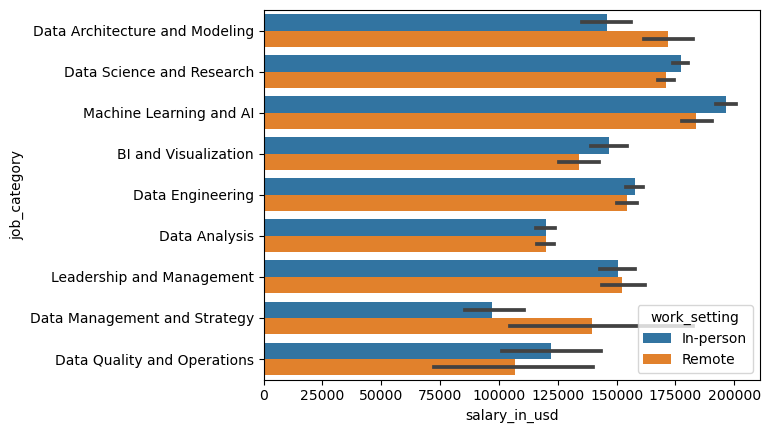

In [34]:
sns.barplot(y='job_category', x='salary_in_usd', data=jobs, hue='work_setting')
plt.show()